In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
## 다음도 스타일 주는법
import matplotlib
matplotlib.style.use('ggplot') 
import math

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [1]:
file_npy = '/ref/analysis/Cre/tophat/merge_all/1.pairedend_contiguity.np.npy'
file_pk = '/ref/analysis/pipelines/pandas_df/Creinhardtii_281_v5.5.gene.gff3.pandas.df.pk'
file_cm = '/ref/analysis/Cre/tophat/merge_all/chromosome.map.txt'

In [95]:
df_cm = pd.read_csv(file_cm,sep='\t',header=None)
df_cm_ix_chr2n = df_cm.set_index(0)
df_cm_ix_n2chr = df_cm.set_index(1)

In [10]:
array_contiguity = np.load(file_npy)

In [11]:
df_gff_cre = pd.read_pickle(file_pk)

In [12]:
df_gff_cre.head()

0             1               2      3  \
genename           longest                                                      
NaN                NaN      chromosome_1  phytozomev10            gene  18766   
Cre01.g000017.v5.5 1        chromosome_1  phytozomev10            mRNA  18766   
                   1        chromosome_1  phytozomev10  five_prime_UTR  18766   
                   1        chromosome_1  phytozomev10             CDS  19163   
                   1        chromosome_1  phytozomev10             CDS  19329   

                                4  5  6  7  \
genename           longest                   
NaN                NaN      20237  .  +  .   
Cre01.g000017.v5.5 1        20237  .  +  .   
                   1        19162  .  +  .   
                   1        19178  .  +  0   
                   1        19948  .  +  2   

                                                                            8  \
genename           longest                                                      
NaN                NaN               ID=Cre01.g000017.v5.5;Name=Cre01.g000017   
Cre01.g000017.v5.5 1        ID=Cre01.g000017.t1.1.v5.5;Name=Cre01.g000017....   
                   1        ID=Cre01.g000017.t1.1.v5.5.five_prime_UTR.1;Pa...   
                   1        ID=Cre01.g000017.t1.1.v5.5.CDS.1;Parent=Cre01....   
                   1        ID=Cre01.g000017.t1.1.v5.5.CDS.2;Parent=Cre01....   

                                     transcriptname  
genename           longest                           
NaN                NaN                         None  
Cre01.g000017.v5.5 1        Cre01.g000017.t1.1.v5.5  
                   1        Cre01.g000017.t1.1.v5.5  
                   1        Cre01.g000017.t1.1.v5.5  
                   1        Cre01.g000017.t1.1.v5.5

In [13]:
left,right = min(df_gff_cre.loc[('Cre10.g418450.v5.5','1')][3]),max(df_gff_cre.loc[('Cre10.g418450.v5.5','1')][4])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':


In [14]:
dic = {'mRNA'       : [],
       'length'     : [],
       'contiguity' : [],
       'ratio.zero' : [],
       'total.depth': [],
       'ratio.depth': []
      }
genelist = set([x for x,y in df_gff_cre.index])
for genename in genelist:
    try:
        if math.isnan(float(genename)):
            continue
    except ValueError:
        pass
    #print type(genename)
    df      = df_gff_cre.loc[genename]
    mask    = (df[2]=='mRNA')
    df_mRNA = df[mask].loc['1']
    
    chromosome = df_mRNA[0] 
    left       = int(df_mRNA[3])
    right      = int(df_mRNA[4])
    length     = right - left + 1 
    echr       = df_cm_ix.loc[chromosome][1]
    #print echr,chromosome
    #print left,right
    contiguity = array_contiguity[echr][left-1:right-1]
    zeropart   = list(contiguity).count(0)
    #if min(contiguity) == 0:
    if 1:
        dic['mRNA'].append(genename)
        dic['contiguity'].append(contiguity)
        dic['ratio.zero'].append(float(zeropart)/float(length))
        dic['length'].append(length)
        dic['total.depth'].append(sum(contiguity))
        dic['ratio.depth'].append(float(sum(contiguity))/float(length))
        
    

In [15]:
df_cont = pd.DataFrame(dic)

In [16]:
df_cont.sort_values(by='length',ascending=False).head()

,contiguity,length,mRNA,ratio.depth,ratio.zero,total.depth
8780,"[212, 212, 212, 212, 212, 212, 212, 212, 212, ...",108652,Cre02.g141086.v5.5,62.444216,0.934783,6784689
2776,"[13, 13, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1...",82983,Cre10.g449750.v5.5,71.693528,0.113746,5949344
16935,"[19, 20, 22, 22, 22, 22, 22, 22, 22, 23, 24, 2...",62112,Cre10.g451600.v5.5,210.449623,0.000064,13071447
12136,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",59292,Cre10.g458350.v5.5,84.228665,0.073922,4994086
9301,"[357, 363, 377, 406, 462, 557, 571, 578, 581, ...",59226,Cre02.g082825.v5.5,71.382923,0.959004,4227725


In [17]:
df_cont_ix = df_cont.set_index('mRNA')

In [18]:
mask = (df_cont_ix['ratio.depth'] > 100) & (df_cont_ix['ratio.zero'] > 0.1 )
df_cont_ix[mask].head()

,contiguity,length,ratio.depth,ratio.zero,total.depth
mRNA,,,,,
Cre10.g418450.v5.5,"[4316, 5418, 6734, 6865, 7406, 10049, 10915, 1...",1726,39254.230591,0.273465,67752802
Cre12.g548200.v5.5,"[270, 271, 271, 271, 271, 273, 274, 274, 276, ...",5916,263.423259,0.156356,1558412
Cre03.g197500.v5.5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4052,5201.485686,0.121175,21076420
Cre02.g085150.v5.5,"[94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 9...",10216,127.415623,0.159358,1301678
Cre01.g041855.v5.5,"[210, 219, 228, 235, 297, 337, 327, 334, 342, ...",2932,434.331514,0.284447,1273460


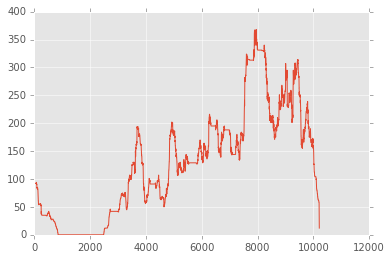

In [19]:
y = df_cont_ix.loc['Cre02.g085150.v5.5']['contiguity']
x = np.arange(len(y))
plt.plot(x,y)

In [20]:
df_cont_ix.loc['Cre06.g293700.v5.5'].values[0][50:]

array([521, 525, 529, ..., 216, 178, 163])

In [21]:
## continuous genomic regions retrieval 
rows,columns = np.shape(array_contiguity)

In [177]:
def get_block(array,depth_cut=10):
    lim_len_block = 100
    #depth_cut     = 0 # 최소한 10개 리드는 초과 해야 인정
    block_list = []
    #print(len(np.shape(array)))
    if len(np.shape(array)) == 1:
        rows = 1
        block = []
        for n,j in enumerate(array):
            if j > depth_cut:
                block.append(n)
            else:
                if len(block) > lim_len_block:
                    block_list.append([block[0],block[-1]])
                    block = []
                else:
                    block = []
    else: 
        rows, columns = np.shape(array)       
        for i in range(rows):
            earray = array[i]
            block = []
            for n,j in enumerate(earray):
                if j > depth_cut:
                    block.append(n)
                else:
                    if len(block) > lim_len_block:
                        block_list.append([i,block[0],block[-1]])
                        block = []
                    else:
                        block = []
    return block_list


In [180]:
def get_genename(chromosome,left,right):
    gene_list = []
    if str(type(df_gff_cre_gene.loc[chromosome])) == "<class 'pandas.core.frame.DataFrame'>":
        df = df_gff_cre_gene.loc[chromosome].reset_index()
        for i in df.index:
            #print(df.loc[i])
            g_left  = df.loc[i][3]
            g_right = df.loc[i][4]
            if (left < g_left < right) or (left < g_right < right):
                gene_list.append(df.loc[i]['genename'])
            elif right < g_left:
                break
    else:
        series = df_gff_cre_gene.loc[chromosome]
        g_left  = series[3]
        g_right = series[4]
        if (left < g_left < right) or (left < g_right < right):
            gene_list.append(series['genename'])
    return gene_list

In [137]:
df_gff_cre_row = df_gff_cre.reset_index()
mask = (df_gff_cre_row[2] == 'mRNA') & (df_gff_cre_row['longest'] == '1')
df_gff_cre_gene = df_gff_cre_row[mask].set_index(0)
str(type(df_gff_cre_gene.loc['chromosome_1']))

"<class 'pandas.core.frame.DataFrame'>"

In [178]:
block_list_cont = get_block(array_contiguity)

In [23]:
array_genemodel = np.zeros([rows,columns],dtype=np.int)

In [24]:
df_gff_cre.sortlevel(inplace=True)

In [25]:
genenames = set(df_gff_cre.index.get_level_values('genename'))

In [26]:
genenames = list(genenames)[1:]

In [27]:
for gene in genenames:
    chromosome = df_gff_cre.loc[(gene,'1')][0]
    left,right = min(df_gff_cre.loc[(gene,'1')][3]),max(df_gff_cre.loc[(gene,'1')][4])
    echr       = df_cm_ix.loc[chromosome]
    array_genemodel[echr,int(left-1):int(right)-1] += 1 

In [181]:
# Merge list
result = []
for echr, left, right in block_list_cont:
    inside_existence = get_block(array_genemodel[echr][left:right],depth_cut=0)
    if len(inside_existence) > 0:
        #print(echr)
        #print(echr,left,right,get_genename(df_cm_ix_n2chr.loc[echr][0],left,right), inside_existence)
        result.append([echr,left,right,get_genename(df_cm_ix_n2chr.loc[echr][0],left,right), inside_existence])

In [182]:
merge_list_mayra_pcr = []
for r in result:
    genelist = r[3]
    for gene in genelist:
        if '.'.join(gene.split('.')[0:2]) in right_sized_genes:
            #print(gene, r)
            if r in merge_list_mayra_pcr:
                pass
            else:
                merge_list_mayra_pcr.append(r)


In [183]:
merge_list_mayra_pcr

[[0,
  46456,
  77232,
  ['Cre01.g000150.v5.5',
   'Cre01.g000200.v5.5',
   'Cre01.g000250.v5.5',
   'Cre01.g000300.v5.5',
   'Cre01.g000350.v5.5',
   'Cre01.g000400.v5.5',
   'Cre01.g000450.v5.5',
   'Cre01.g000500.v5.5'],
  [[96, 5067],
   [5133, 7577],
   [7679, 11461],
   [11520, 14227],
   [14283, 18497],
   [18599, 23739]]],
 [0, 89715, 98671, ['Cre01.g000650.v5.5', 'Cre01.g000700.v5.5'], [[0, 7820]]],
 [0,
  329303,
  340279,
  ['Cre01.g001983.v5.5', 'Cre01.g002050.v5.5'],
  [[3, 4116]]],
 [0, 347973, 350449, ['Cre01.g002200.v5.5'], [[18, 2461]]],
 [0, 372646, 375043, ['Cre01.g002300.v5.5'], [[29, 2387]]],
 [0,
  826465,
  841418,
  ['Cre01.g004200.v5.5', 'Cre01.g004250.v5.5', 'Cre01.g004300.v5.5'],
  [[0, 6561], [6689, 8193]]],
 [0, 857403, 864483, ['Cre01.g004500.v5.5'], [[65, 7001]]],
 [0,
  885736,
  891442,
  ['Cre01.g004651.v5.5', 'Cre01.g004700.v5.5'],
  [[10, 1678], [2221, 5698]]],
 [0, 943056, 951187, ['Cre01.g005200.v5.5'], [[0, 8118]]],
 [0, 975614, 977838, ['Cre01.g0

In [ ]:
# Split list
for echr, left, right in df_gene.....

In [156]:
# mayra list
file_mayra_pcr = '/ref/analysis/Cre/mayra/mayra.pcr.list.txt'
df_mayra_pcr   = pd.read_csv(file_mayra_pcr,sep='\t') 

file_mayra_plate = '/ref/analysis/Cre/mayra/mayra.plate.index.txt'
df_mayra_plate   = pd.read_csv(file_mayra_plate,sep='\t') 
df_mayra_plate.set_index(['platename','Pos.Nr'],inplace=True)
def get_genename(df):
    x = df['platename']
    y = df['Pos.Nr']
    genename = df_mayra_plate.loc[(x,y)]['ChlreGene_ID55']
    return genename
df_mayra_pcr['genename'] = df_mayra_pcr.apply(get_genename,axis=1)
df_mayra_pcr_ix = df_mayra_pcr.set_index('genename')

In [158]:
mask        = (df_mayra_pcr['right size'] == 1)
right_sized = df_mayra_pcr[mask]

In [163]:
right_sized_genes = list(right_sized['genename'])

In [99]:
df_cm_ix_n2chr.loc[0][0]

'chromosome_1'

In [52]:
len(np.shape(array_genemodel[0,175303:175777]))

1

In [29]:
len(block_list)

25093

In [30]:
block_list

[[0, 0, 3500],
 [0, 3597, 11477],
 [0, 11485, 12877],
 [0, 14102, 14601],
 [0, 16565, 30356],
 [0, 30756, 34827],
 [0, 34829, 41041],
 [0, 41747, 46333],
 [0, 46427, 77233],
 [0, 77465, 77698],
 [0, 77965, 78396],
 [0, 78413, 78928],
 [0, 78963, 80246],
 [0, 80505, 82425],
 [0, 83357, 88908],
 [0, 89695, 98681],
 [0, 98781, 103556],
 [0, 103892, 105305],
 [0, 105761, 110797],
 [0, 111304, 113961],
 [0, 114348, 116425],
 [0, 116514, 120741],
 [0, 121541, 123044],
 [0, 123157, 125624],
 [0, 125685, 130320],
 [0, 130392, 134540],
 [0, 134553, 138095],
 [0, 138184, 142684],
 [0, 142691, 143805],
 [0, 143862, 145700],
 [0, 145778, 146397],
 [0, 146601, 147428],
 [0, 147499, 147709],
 [0, 147860, 150213],
 [0, 150281, 150713],
 [0, 150795, 151969],
 [0, 152069, 152506],
 [0, 152510, 156479],
 [0, 156545, 156758],
 [0, 156769, 158799],
 [0, 159046, 160096],
 [0, 160294, 165858],
 [0, 166731, 167836],
 [0, 167918, 168764],
 [0, 168953, 169071],
 [0, 169356, 169569],
 [0, 169636, 170026],
 [0, 

In [31]:
def comp(a,b):
    if a==0 and b==0:
        return 0
    elif a>0 and b>0:
        return 3
    elif a>0 and b==0:
        return 1
    elif a==0 and b>0:
        return 2
comp_vec = np.vectorize(comp)

In [32]:
s,e = 1599023,1622938
a = array_contiguity[0,s:e]
b = array_genemodel[0,s:e]
r = comp_vec(a,b)

In [33]:
mask = (r<2)
r[mask]

array([1, 1, 1, ..., 1, 1, 1])

In [34]:
array_comp = np.zeros([rows,columns],dtype=np.int)
for row in range(rows):
    array_comp[row,:] = comp_vec(array_contiguity[row,:],array_genemodel[row,:])

In [35]:
array_comp

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
df_gff_cre.head()

0             1     2      3      4  5  6  7  \
genename longest                                                            
NaN      NaN      chromosome_1  phytozomev10  gene  18766  20237  .  +  .   
         NaN      chromosome_1  phytozomev10  gene  20356  23957  .  +  .   
         NaN      chromosome_1  phytozomev10  gene  24026  30617  .  +  .   
         NaN      chromosome_1  phytozomev10  gene  30776  41037  .  +  .   
         NaN      chromosome_1  phytozomev10  gene  41896  46547  .  +  .   

                                                         8 transcriptname  
genename longest                                                           
NaN      NaN      ID=Cre01.g000017.v5.5;Name=Cre01.g000017           None  
         NaN      ID=Cre01.g000033.v5.5;Name=Cre01.g000033           None  
         NaN      ID=Cre01.g000050.v5.5;Name=Cre01.g000050           None  
         NaN      ID=Cre01.g000100.v5.5;Name=Cre01.g000100           None  
         NaN      ID=Cre01.g000150.v5.5;Name=Cre01.g000150           None

In [39]:
block_list = get_block(array_comp)

In [41]:
len(block_list)

10309

In [42]:
block_list

[[0, 0, 12918],
 [0, 13133, 13676],
 [0, 14016, 14601],
 [0, 15234, 15484],
 [0, 16344, 41080],
 [0, 41256, 77235],
 [0, 77289, 88987],
 [0, 89575, 103739],
 [0, 103878, 110845],
 [0, 110962, 114018],
 [0, 114146, 120742],
 [0, 121435, 138119],
 [0, 138151, 166111],
 [0, 166113, 166488],
 [0, 166667, 177527],
 [0, 178687, 209730],
 [0, 209852, 224730],
 [0, 224939, 229911],
 [0, 230075, 237785],
 [0, 237809, 244032],
 [0, 244984, 248191],
 [0, 248566, 286188],
 [0, 286285, 305009],
 [0, 305379, 305736],
 [0, 306256, 313461],
 [0, 313541, 329113],
 [0, 329301, 347879],
 [0, 347957, 360657],
 [0, 360862, 375114],
 [0, 375158, 383347],
 [0, 383403, 383976],
 [0, 384275, 388658],
 [0, 437375, 455688],
 [0, 455712, 455926],
 [0, 456273, 473104],
 [0, 473705, 559484],
 [0, 559565, 563431],
 [0, 563607, 566145],
 [0, 566225, 583146],
 [0, 583534, 601863],
 [0, 601906, 602136],
 [0, 602161, 626218],
 [0, 626383, 628691],
 [0, 644745, 687871],
 [0, 688995, 694471],
 [0, 694649, 700904],
 [0, 70